In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load all sheets from the Excel file
all_sheets = pd.read_excel("air_quality_index_dataset.xlsx", sheet_name=None)

# Merge all sheets into one DataFrame with a 'City' column
frames = []
for city, dfc in all_sheets.items():
    dfc = dfc.copy()
    dfc["City"] = city   # Add city name
    frames.append(dfc)

# Concatenate all cities
data = pd.concat(frames, ignore_index=True)

# Quick check
print("Shape:", data.shape)   # rows, cols
print("Columns:", list(data.columns))
print(data.head())

Shape: (944182, 23)
Columns: ['Date', 'Time', 'SO2', 'NO', 'NO2', 'NOX', 'CO', 'CO 8hr', 'O3', 'O3 8hr', 'PM2.5', 'PM10', 'Wind Speed', 'Wind Dir', 'Temperature', 'RH', 'Solar Rad', 'BP', 'Rain', 'V Wind Speed', 'Unnamed: 20', 'City', 'Unnamed: 21']
                  Date   Time  SO2  NO  NO2  NOX  CO  CO 8hr  O3 O3 8hr  ...  \
0  2012-11-01 00:00:00  01:00  NaN NaN  NaN  NaN NaN     NaN NaN    NaN  ...   
1  2012-11-01 00:00:00  02:00  NaN NaN  NaN  NaN NaN     NaN NaN    NaN  ...   
2  2012-11-01 00:00:00  03:00  NaN NaN  NaN  NaN NaN     NaN NaN    NaN  ...   
3  2012-11-01 00:00:00  04:00  NaN NaN  NaN  NaN NaN     NaN NaN    NaN  ...   
4  2012-11-01 00:00:00  05:00  NaN NaN  NaN  NaN NaN     NaN NaN    NaN  ...   

  Wind Dir Temperature  RH Solar Rad  BP  Rain  V Wind Speed  Unnamed: 20  \
0      NaN         NaN NaN       NaN NaN   NaN           NaN          NaN   
1      NaN         NaN NaN       NaN NaN   NaN           NaN          NaN   
2      NaN         NaN NaN       NaN N

In [4]:
# Select only numeric columns (for stats)
num_cols = data.select_dtypes(include="number").columns.tolist()

print("Numeric columns:", num_cols)

Numeric columns: ['NO', 'NO2', 'CO', 'CO 8hr', 'O3', 'Temperature', 'RH', 'Solar Rad', 'BP', 'Rain', 'V Wind Speed']


In [5]:
# Descriptive statistics across ALL cities combined
desc = data[num_cols].describe().T  # transpose so each row = feature
median = data[num_cols].median()
variance = data[num_cols].var()

print("\n=== DESCRIPTIVE STATS (mean/std/min/max etc.) ===\n", desc)
print("\n=== MEDIAN ===\n", median)
print("\n=== VARIANCE ===\n", variance)


=== DESCRIPTIVE STATS (mean/std/min/max etc.) ===
                  count        mean         std     min        25%        50%  \
NO            487774.0   21.073160   41.322437  -12.64     1.9000     5.6300   
NO2           484768.0   14.331759   18.456680    0.00     3.4000     8.6100   
CO            515964.0    1.685088    2.222427    0.00     0.5700     1.0500   
CO 8hr        461844.0    1.535332    1.790235    0.01     0.5925     1.0625   
O3            531487.0   10.139679   13.960875    0.00     1.8300     4.9900   
Temperature   465850.0   25.642249    5.896866  -25.75    22.2400    26.3000   
RH            475237.0   72.430898   23.942868    3.56    60.2300    76.1500   
Solar Rad     426815.0  232.394210  281.884187    0.00     8.1100    95.7200   
BP            424428.0  999.792869  141.499911    0.00  1001.3100  1007.3300   
Rain          297492.0    0.609854    8.753823 -172.49     0.0300     0.0800   
V Wind Speed  114866.0    1.309987    1.695364   -1.94     0.1200   

In [7]:
# Make sure pollutant columns are numeric
pollutants = ["PM2.5","PM10","NO2","NOx","NO","SO2","CO","O3","AQI"]

for col in pollutants:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")

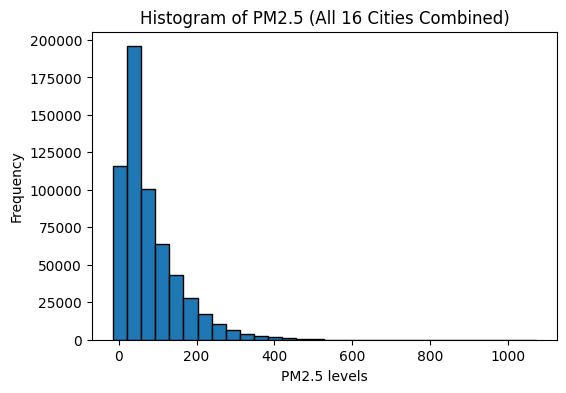

In [8]:
plt.figure(figsize=(6,4))
data["PM2.5"].dropna().plot(kind="hist", bins=30, edgecolor="black")
plt.title("Histogram of PM2.5 (All 16 Cities Combined)")
plt.xlabel("PM2.5 levels")
plt.ylabel("Frequency")
plt.show()

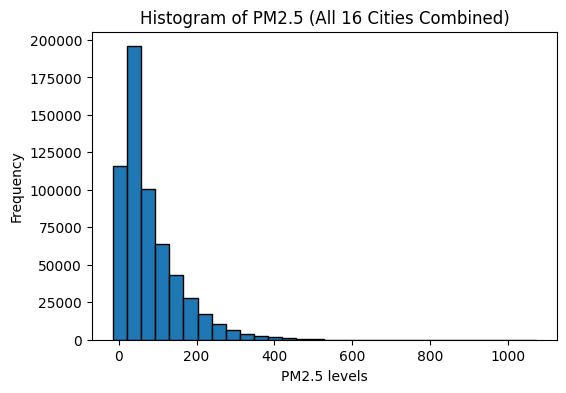

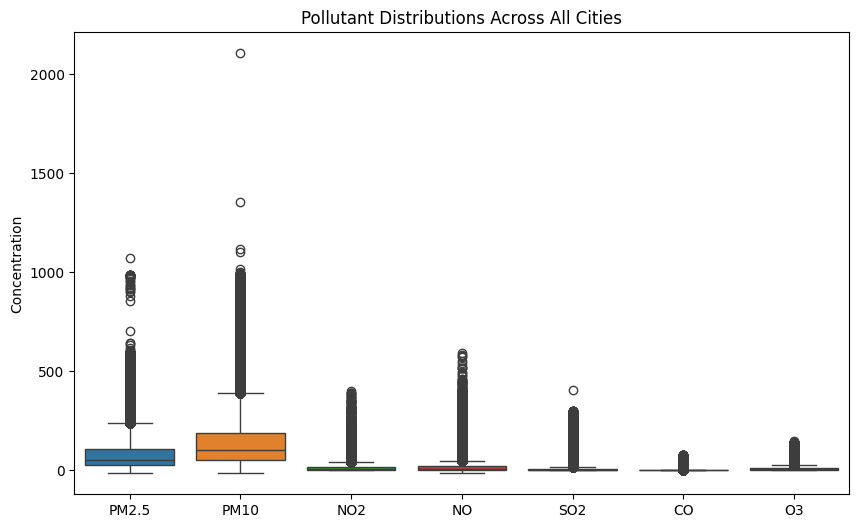

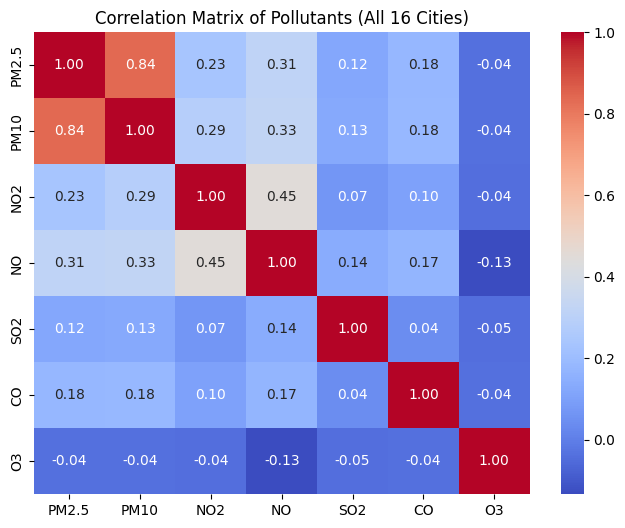

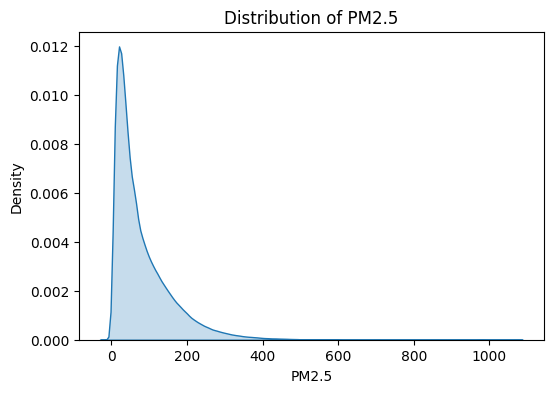

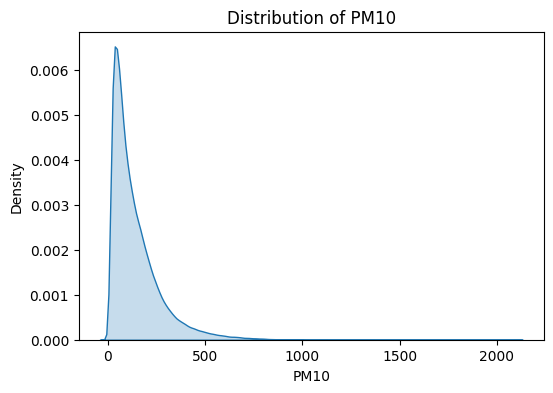

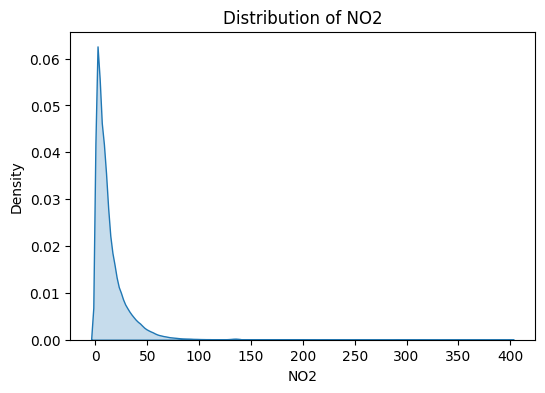

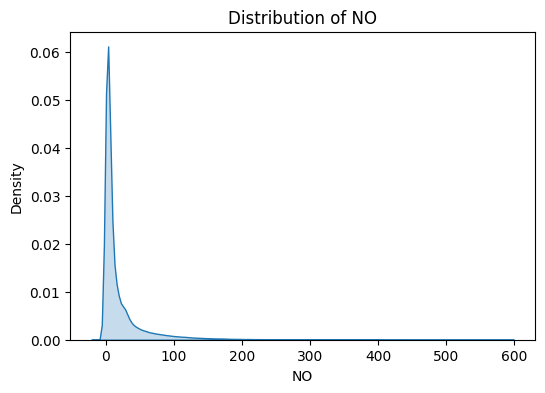

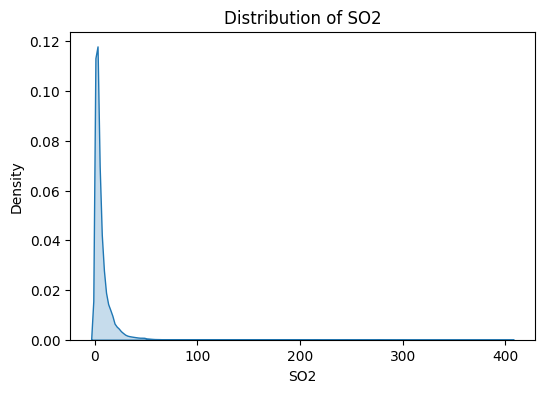

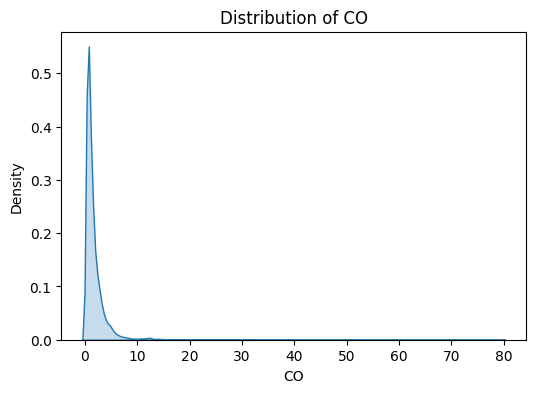

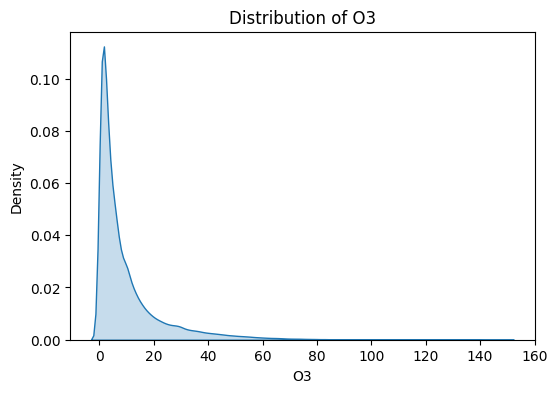

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for PM2.5 (you can repeat for others)
plt.figure(figsize=(6,4))
data["PM2.5"].dropna().plot(kind="hist", bins=30, edgecolor="black")
plt.title("Histogram of PM2.5 (All 16 Cities Combined)")
plt.xlabel("PM2.5 levels")
plt.ylabel("Frequency")
plt.show()

# 2. Boxplots for pollutants
pollutants = [c for c in ["PM2.5","PM10","NO2","NOx","NO","SO2","CO","O3","AQI"] if c in data.columns]

plt.figure(figsize=(10,6))
sns.boxplot(data=data[pollutants])
plt.title("Pollutant Distributions Across All Cities")
plt.ylabel("Concentration")
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[pollutants].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Pollutants (All 16 Cities)")
plt.show()

# 4. Distribution plots for pollutants
for col in pollutants:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data[col].dropna(), fill=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

Using NOx column: NOX


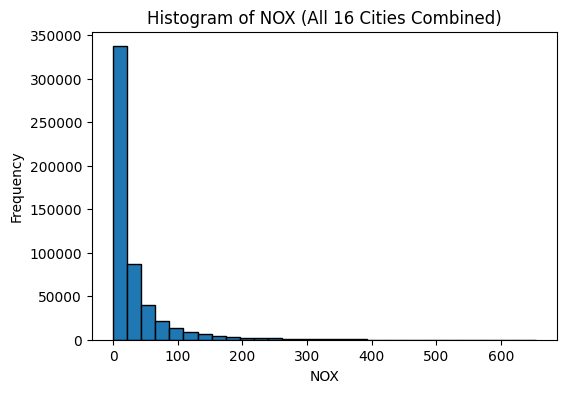

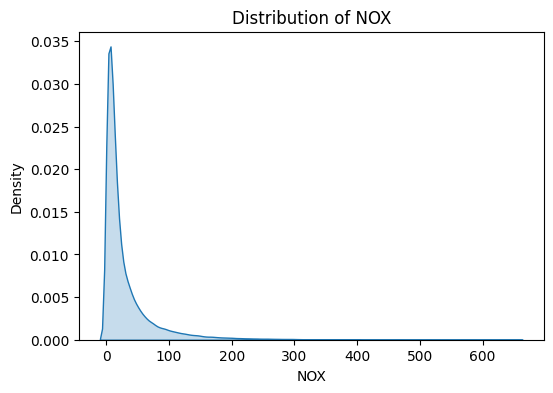

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Find a NOx-like column (case-insensitive, tolerant to extra text) ---
nox_candidates = [c for c in data.columns if "nox" in c.strip().lower()]
if not nox_candidates:
    print("NOx column not found. Check your column names:", list(data.columns))
else:
    nox_col = nox_candidates[0]   # pick the first match
    print("Using NOx column:", nox_col)

    # Ensure numeric
    data[nox_col] = pd.to_numeric(data[nox_col], errors="coerce")

    # Histogram
    plt.figure(figsize=(6,4))
    data[nox_col].dropna().plot(kind="hist", bins=30, edgecolor="black")
    plt.title(f"Histogram of {nox_col} (All 16 Cities Combined)")
    plt.xlabel(nox_col); plt.ylabel("Frequency")
    plt.show()

    # KDE (distribution curve)
    plt.figure(figsize=(6,4))
    sns.kdeplot(data[nox_col].dropna(), fill=True)
    plt.title(f"Distribution of {nox_col}")
    plt.xlabel(nox_col); plt.ylabel("Density")
    plt.show()

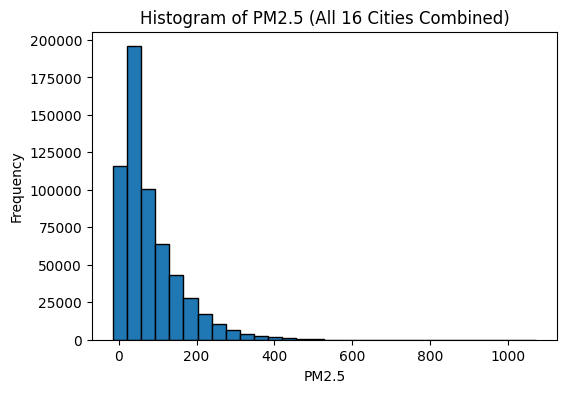

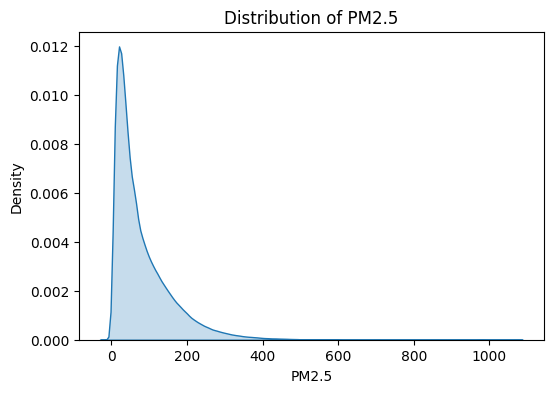

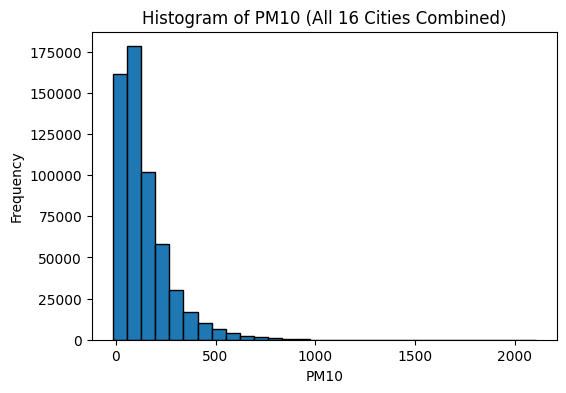

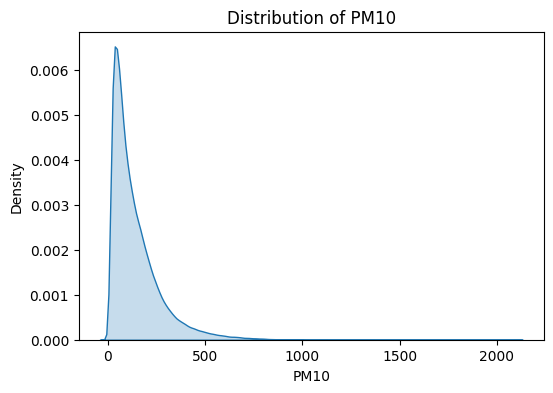

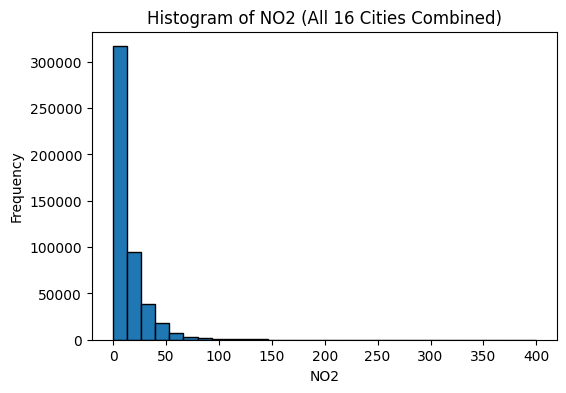

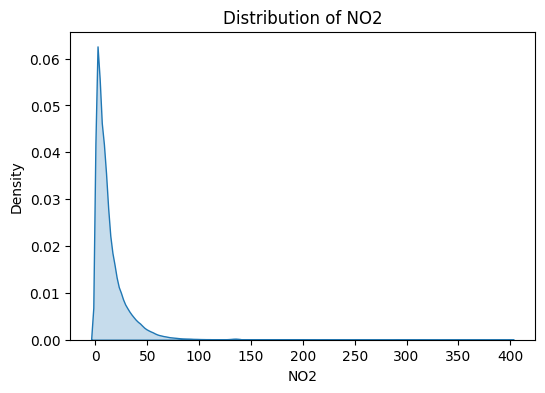

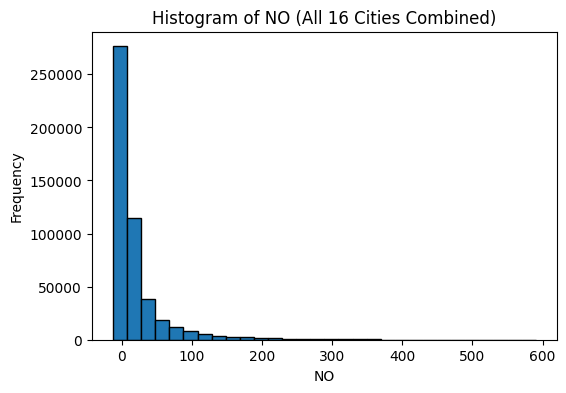

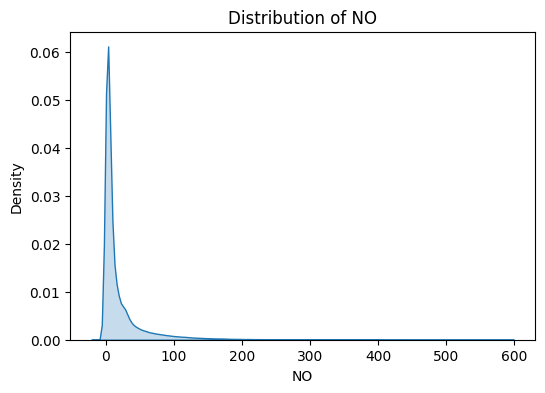

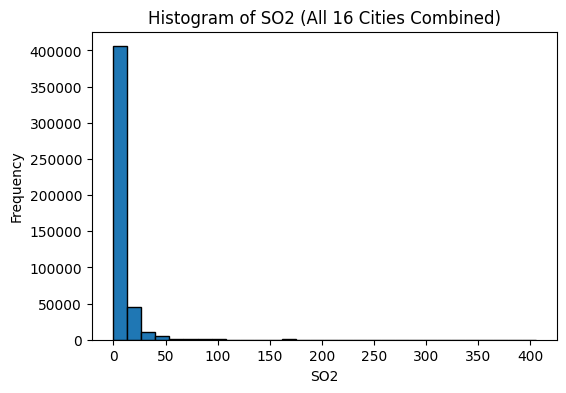

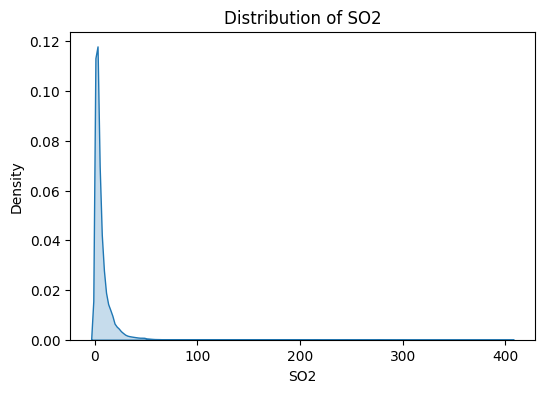

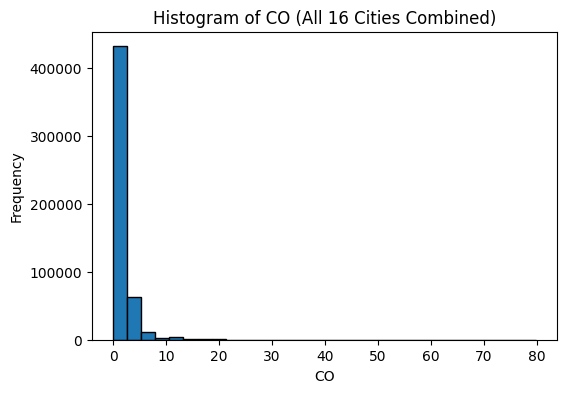

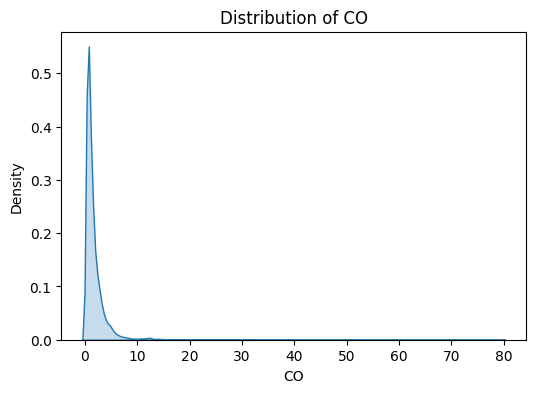

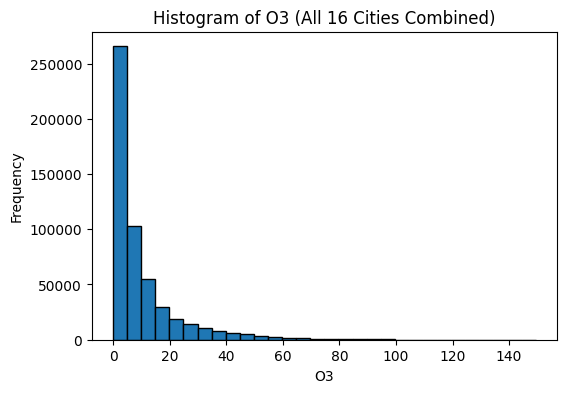

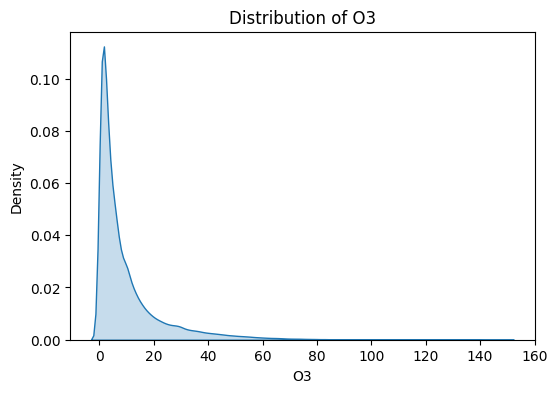

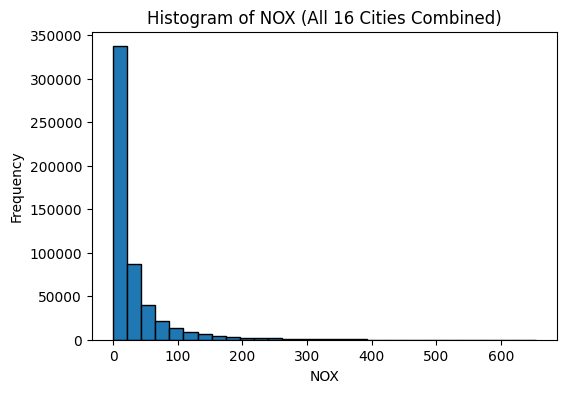

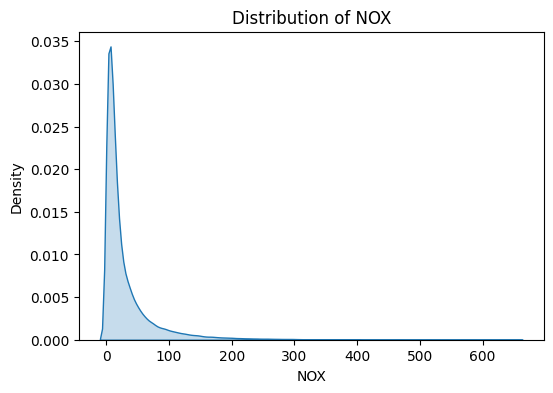

In [11]:
# Build pollutant list from what actually exists (including NOx)
base_pollutants = ["PM2.5","PM10","NO2","NO","SO2","CO","O3","AQI"]
pollutants = [c for c in base_pollutants if c in data.columns]

# Add the detected NOx column (if it's a different spelling)
for c in data.columns:
    if "nox" in c.strip().lower() and c not in pollutants:
        pollutants.append(c)

# Coerce numeric
for col in pollutants:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Loop: hist + KDE for each pollutant (including NOx)
for col in pollutants:
    plt.figure(figsize=(6,4))
    data[col].dropna().plot(kind="hist", bins=30, edgecolor="black")
    plt.title(f"Histogram of {col} (All 16 Cities Combined)")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.kdeplot(data[col].dropna(), fill=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Density")
    plt.show()